In [6]:
def ret_weight(name):
    # name = 'CCDB_ECOLI_Adkar_2012'
    try:
        pred = f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/inference/fast_eval/{name}/DeepSequence/pll.csv'
        ddg = f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/inference/fast_eval/{name}/psnet.pkl'
        y = f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/data/fast_eval/{name}/data.csv'
        import numpy as np
        import pandas as pd
        pred = pd.read_csv(pred)['pll']
        ddg = pd.read_pickle(ddg)
        y = pd.read_csv(y)['log_fitness']

        import numpy as np
        from scipy.optimize import minimize
        from scipy.stats import spearmanr

        # 假设你已经有三个等长的数组 ddg, pred 和 y
        ddg = np.array(ddg)   # 你的ddg数组
        pred = np.array(pred)  # 你的pred数组
        y = np.array(y)     # 你的y数组

        # 定义目标函数来最小化负的Spearman相关性
        def objective(alpha):
            # 计算加权和
            weighted_sum = alpha * ddg + (1 - alpha) * pred
            # 返回负的Spearman相关性，因为我们要最大化相关性
            return spearmanr(weighted_sum, y).correlation

        # 使用scipy的minimize函数来优化alpha
        result = minimize(objective, 0,bounds=[(-1, 2)],method='Nelder-Mead')  # 夹角相当于权重，初值设为0.5

        # 最优的alpha值
        optimal_alpha = result.x[0]
        # print(f"Optimal alpha: {optimal_alpha}")

        # 使用最优的alpha计算加权和
        optimal_weighted_sum = optimal_alpha * ddg + (1 - optimal_alpha) * pred

        # 输出最优加权和与y之间的Spearman相关性
        spearman_corr = spearmanr(optimal_weighted_sum, y).correlation
        # print(f"Maximum Spearman correlation: {spearman_corr}")
        
        return optimal_alpha
    except:
        return np.nan

import pandas as pd
import glob
import numpy as np
files = glob.glob('/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/results/*/')
# key = 'BG_STRSQ_Abate2015-enrichment'
vae_onehot = []
vae_onehot_ddg = []
for key in [ i.split('/')[-2] for i in  files]:
    try:
        df_ = pd.read_csv(f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/results/{key}/results.csv')

        # df_ =pd.read_csv(f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/results/BLAT_ECOLX_Ranganathan2015-2500/results_BLAT_ECOLX_Ranganathan2015-2500.csv')
        CORE_PREDICTORS = [
            'vae+onehot', 
            'vae+onehot+ddg'
        ]
        for model in CORE_PREDICTORS:
            # print(model, df_[df_.predictor==model].spearman.mean())
            if model == 'vae+onehot':
                vae_onehot.append(df_[df_.predictor==model].spearman.mean())
            else:
                vae_onehot_ddg.append(df_[df_.predictor==model].spearman.mean())
    except:
        vae_onehot.append(np.nan)
        vae_onehot_ddg.append(np.nan)
        print(key)
vae_onehot = np.array(vae_onehot)
vae_onehot_ddg = np.array(vae_onehot_ddg)
((vae_onehot_ddg-vae_onehot)>0).sum()
# analyze results
spearman_corr = []
coarse_type = []
dir_names = [ i.split('/')[-2] for i in  files]
spearman_corr = []
coarse_type = []
dir_names = [ i.split('/')[-2] for i in  files]
import pandas as pd
df = pd.read_csv('/work/commons/proteingym/DMS_substitutions.csv')
filtered_df = df[df['coarse_selection_type'].isin(['Binding', 'Activity', 'Expression','OrganismalFitness'])]
for dir_name in  dir_names: 


    groundtruth = f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/data/fast_eval/{dir_name}/data.csv'
    deepseq = f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/inference/fast_eval/{dir_name}/DeepSequence/pll.csv'

    df = pd.read_csv(groundtruth)
    df_deepseq = pd.read_csv(deepseq)
    from scipy.stats import spearmanr

    spearman_corr.append(-spearmanr(df['log_fitness'],df_deepseq['pll'])[0])
    coarse_type.append(filtered_df[filtered_df.DMS_id==dir_name].reset_index(drop=True).coarse_selection_type[0])

NRAM_I33A0_Jiang_2016
KCNH2_HUMAN_Kozek_2020
POLG_CXB3N_Mattenberger_2021
F7YBW8_MESOW_Aakre_2015
NPC1_HUMAN_Erwood_2022_RPE1
BRCA2_HUMAN_Erwood_2022_HEK293T
AICDA_HUMAN_Gajula_2014_3cycles
RAF1_HUMAN_Zinkus-Boltz_2019
GCN4_YEAST_Staller_2018
SPG1_STRSG_Wu_2016
F7YBW7_MESOW_Ding_2023
A0A140D2T1_ZIKV_Sourisseau_2019
POLG_HCVJF_Qi_2014
OPSD_HUMAN_Wan_2019
SCN5A_HUMAN_Glazer_2019
GLPA_HUMAN_Elazar_2016
HIS7_YEAST_Pokusaeva_2019
B2L11_HUMAN_Dutta_2010_binding-Mcl-1


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 假设数据 df 已经定义
df = pd.DataFrame({
    'dir_names': dir_names,
    'weight': [ret_weight(i) for i in dir_names],
    'coarse_type': coarse_type,
})
df = df.dropna()

In [8]:
df.coarse_type.unique()

array(['OrganismalFitness', 'Activity', 'Expression', 'Binding'],
      dtype=object)

In [9]:
import numpy as np
for t in df.coarse_type.unique():
    print(np.mean(df[df.coarse_type==t].weight),np.median(df[df.coarse_type==t].weight),t)

0.46504138513513565 0.5952500000000005 OrganismalFitness
0.46406686046511664 0.6038750000000005 Activity
0.6636111111111118 0.7958437500000008 Expression
0.4352692307692312 0.49618750000000045 Binding


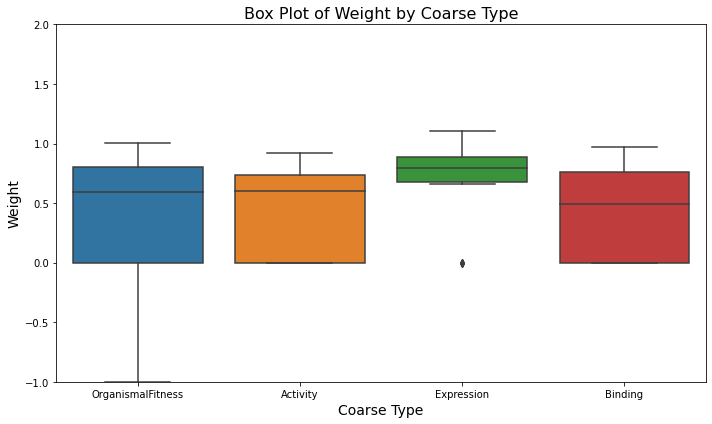

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用seaborn绘制box plot
plt.figure(figsize=(10, 6))

# 绘制不同coarse_type类别的box plot
sns.boxplot(x='coarse_type', y='weight', data=df)
plt.ylim(-1, 2)
# 设置图形标题和标签
plt.title('Box Plot of Weight by Coarse Type', fontsize=16)
plt.xlabel('Coarse Type', fontsize=14)
plt.ylabel('Weight', fontsize=14)

# 显示图形
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import pandas as pd
import glob
a = glob.glob('/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/results/*/results.*vae+onehot+ddg.npy')
import pandas as pd
df = pd.read_csv('/work/commons/proteingym/DMS_substitutions.csv')


In [2]:
test_pred_all = []
test_log_fitness_all = []
test_vae_score_all = []
test_ddg_score_all = []
test_name = []
test_type = []

test_pred_all_vae = []
test_log_fitness_all_vae = []
test_vae_score_all_vae = []
test_ddg_score_all_vae = []
test_name_vae = []
test_type_vae = []
for aa in a:
    result = np.load(aa)
    test_pred, test_log_fitness,test_vae_score,test_ddg_score = result
    test_pred_all.append(test_pred)
    test_log_fitness_all.append(test_log_fitness)
    test_vae_score_all.append(test_vae_score)
    test_ddg_score_all.append(test_ddg_score)
    test_type.append([df[df.DMS_id==aa.split('/')[-2]].reset_index(drop=True).coarse_selection_type[0]]*len(test_pred))
    test_name.append([aa.split('/')[-2]]*len(test_pred))
    
    result = np.load(aa.replace('vae+onehot+ddg','vae+onehot'))
    test_pred, test_log_fitness,test_vae_score,test_ddg_score = result
    test_pred_all_vae.append(test_pred)
    test_log_fitness_all_vae.append(test_log_fitness)
    test_vae_score_all_vae.append(test_vae_score)
    test_ddg_score_all_vae.append(test_ddg_score)
    
    test_name_vae.append([df[df.DMS_id==aa.split('/')[-2]].reset_index(drop=True).coarse_selection_type[0]]*len(test_pred))
    test_type_vae.append([aa.split('/')[-2]]*len(test_pred))
    
test_pred_all = np.concatenate(test_pred_all)
test_log_fitness_all = np.concatenate(test_log_fitness_all)
test_vae_score_all = np.concatenate(test_vae_score_all)
test_ddg_score_all = np.concatenate(test_ddg_score_all)
test_name = np.concatenate(test_name)

test_pred_all_vae = np.concatenate(test_pred_all_vae)
test_log_fitness_all_vae = np.concatenate(test_log_fitness_all_vae)
test_vae_score_all_vae = np.concatenate(test_vae_score_all_vae)
test_ddg_score_all_vae = np.concatenate(test_ddg_score_all_vae)
test_name_vae = np.concatenate(test_name_vae)

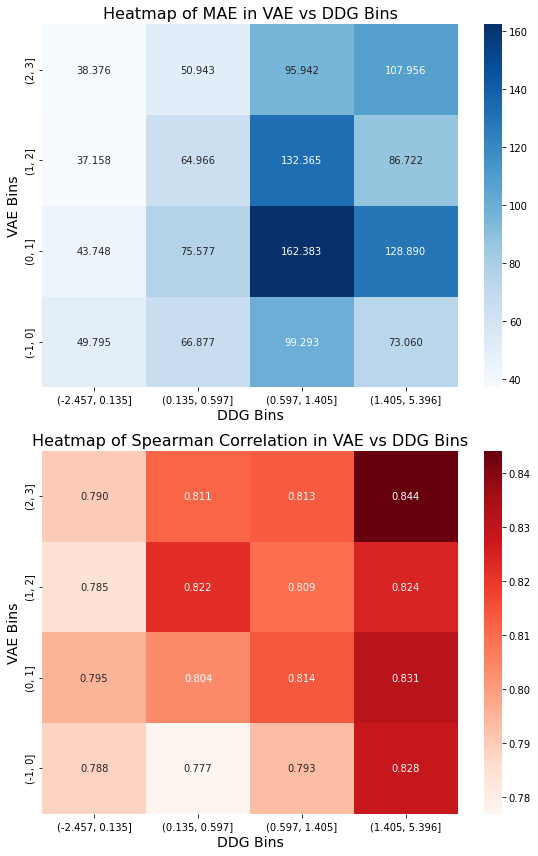

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# 将 ddg 和 vae 分成 4 个等量的区间
ddg_bins = pd.qcut(test_ddg_score_all, 4)
vae_bins = pd.cut(test_vae_score_all, bins=[-1, 0, 1, 2, 3])

# 计算 MAE
def calculate_mae(group):
    return np.mean(np.abs(group['test_pred_all'] - group['test_log_fitness_all']))

# 计算 Spearman correlation (Rho)
def cal_rho(group):
    return spearmanr(group['test_pred_all'], group['test_log_fitness_all']).correlation
    spearman_list = []
    # print(group['test_name'].unique())
    for name in group['test_name'].unique():
        spearman_list.append(spearmanr(group[group['test_name']==name]['test_pred_all'], group[group['test_name']==name]['test_log_fitness_all']).correlation)
    # print(spearman_list)
    return np.nanmean(spearman_list)

# 将数据组合成 DataFrame
df = pd.DataFrame({
    'vae_bins': vae_bins,
    'ddg_bins': ddg_bins,
    'test_pred_all': test_pred_all,
    'test_log_fitness_all': test_log_fitness_all,
    'test_name': test_name
})
spearman_list = []
for name in df.test_name.unique():
    spearman_list.append(spearmanr(df[df.test_name==name].test_pred_all,df[df.test_name==name].test_log_fitness_all).correlation)

# 按照 vae_bins 和 ddg_bins 分组，计算每个分组的 MAE 和 Spearman correlation
mae_data = df.groupby(['vae_bins', 'ddg_bins']).apply(calculate_mae).unstack()
rho_data = df.groupby(['vae_bins', 'ddg_bins']).apply(cal_rho).unstack()
# 反转 VAE bins 的顺序
mae_data = mae_data.reindex(index=mae_data.index[::-1])
rho_data = rho_data.reindex(index=rho_data.index[::-1])

# 创建带子图的图形 (2x1)
fig, axes = plt.subplots(nrows=2, figsize=(8, 12))

# 绘制 MAE Heatmap
sns.heatmap(mae_data, annot=True, fmt=".3f", cmap="Blues", cbar=True, ax=axes[0])
axes[0].set_title('Heatmap of MAE in VAE vs DDG Bins', fontsize=16)
axes[0].set_xlabel('DDG Bins', fontsize=14)
axes[0].set_ylabel('VAE Bins', fontsize=14)

# 绘制 Spearman Correlation Heatmap
sns.heatmap(rho_data, annot=True, fmt=".3f", cmap="Reds", cbar=True, ax=axes[1])
axes[1].set_title('Heatmap of Spearman Correlation in VAE vs DDG Bins', fontsize=16)
axes[1].set_xlabel('DDG Bins', fontsize=14)
axes[1].set_ylabel('VAE Bins', fontsize=14)

# 调整布局并显示图形
plt.tight_layout()
plt.show()


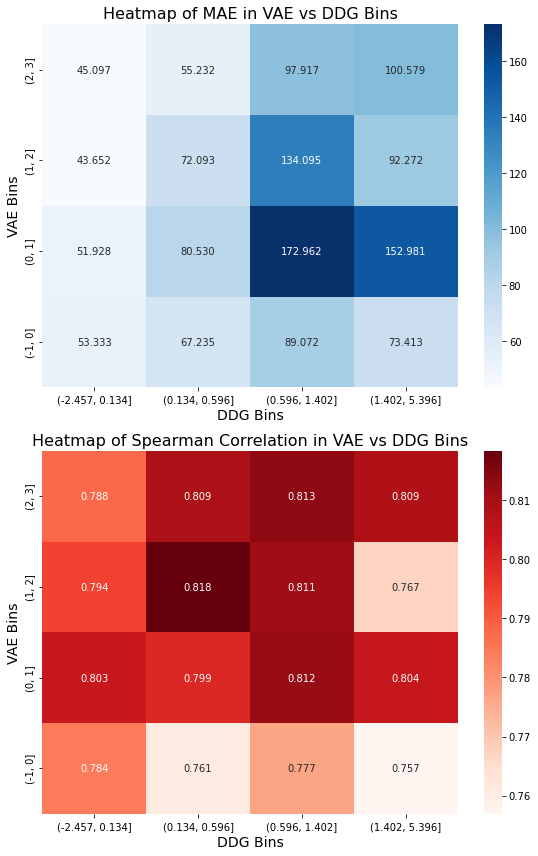

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# 将 ddg 和 vae 分成 4 个等量的区间
ddg_bins = pd.qcut(test_ddg_score_all_vae, 4)
vae_bins = pd.cut(test_vae_score_all_vae, bins=[-1, 0, 1, 2, 3])

# 计算 MAE
def calculate_mae(group):
    return np.mean(np.abs(group['test_pred_all'] - group['test_log_fitness_all']))

# 计算 Spearman correlation (Rho)
def cal_rho(group):
    return spearmanr(group['test_pred_all'], group['test_log_fitness_all']).correlation

# 将数据组合成 DataFrame
df = pd.DataFrame({
    'vae_bins': vae_bins,
    'ddg_bins': ddg_bins,
    'test_pred_all': test_pred_all_vae,
    'test_log_fitness_all': test_log_fitness_all_vae
})

# 按照 vae_bins 和 ddg_bins 分组，计算每个分组的 MAE 和 Spearman correlation
mae_data = df.groupby(['vae_bins', 'ddg_bins']).apply(calculate_mae).unstack()
rho_data = df.groupby(['vae_bins', 'ddg_bins']).apply(cal_rho).unstack()
# 反转 VAE bins 的顺序
mae_data = mae_data.reindex(index=mae_data.index[::-1])
rho_data = rho_data.reindex(index=rho_data.index[::-1])

# 创建带子图的图形 (2x1)
fig, axes = plt.subplots(nrows=2, figsize=(8, 12))

# 绘制 MAE Heatmap
sns.heatmap(mae_data, annot=True, fmt=".3f", cmap="Blues", cbar=True, ax=axes[0])
axes[0].set_title('Heatmap of MAE in VAE vs DDG Bins', fontsize=16)
axes[0].set_xlabel('DDG Bins', fontsize=14)
axes[0].set_ylabel('VAE Bins', fontsize=14)

# 绘制 Spearman Correlation Heatmap
sns.heatmap(rho_data, annot=True, fmt=".3f", cmap="Reds", cbar=True, ax=axes[1])
axes[1].set_title('Heatmap of Spearman Correlation in VAE vs DDG Bins', fontsize=16)
axes[1].set_xlabel('DDG Bins', fontsize=14)
axes[1].set_ylabel('VAE Bins', fontsize=14)

# 调整布局并显示图形
plt.tight_layout()
plt.show()


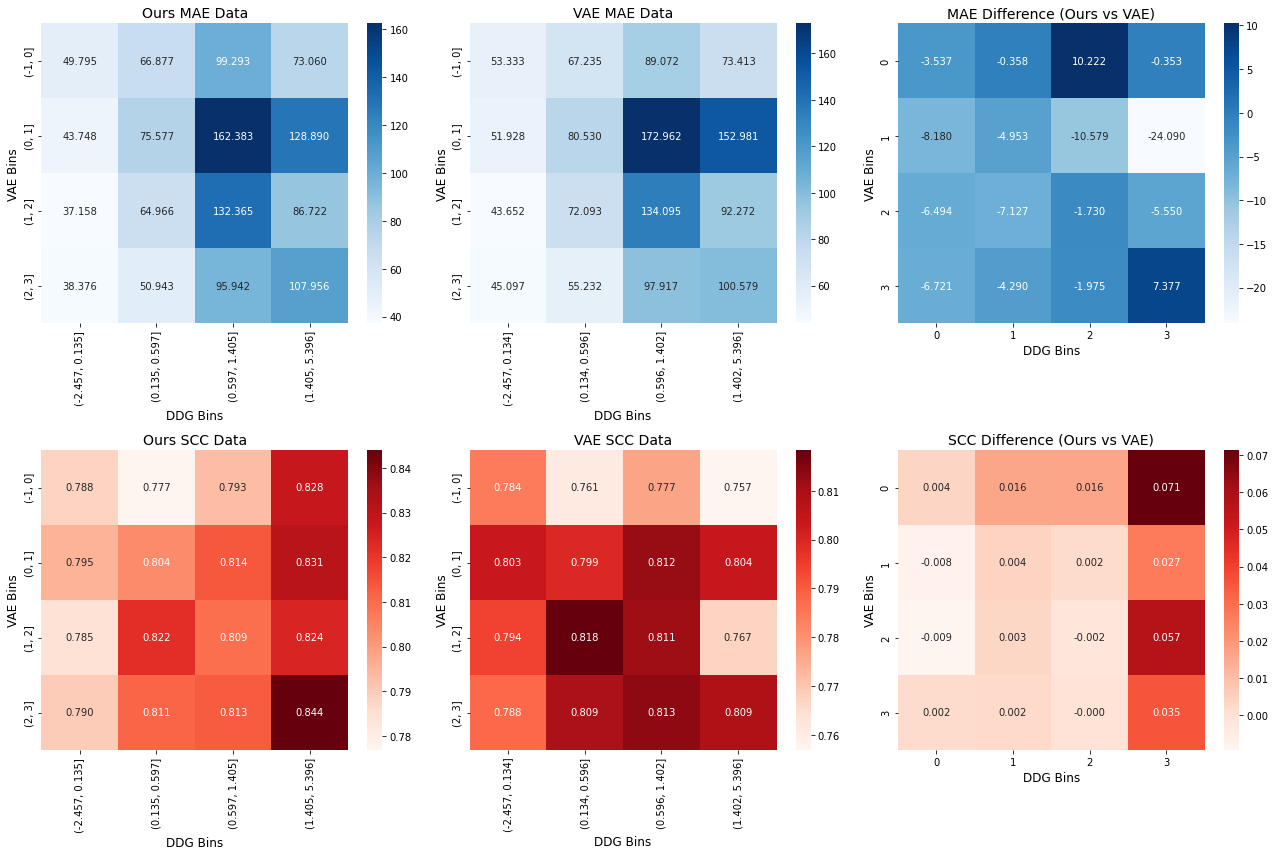

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# 原始数据集的 ddg 和 vae 分成 4 个等量的区间
ddg_bins = pd.qcut(test_ddg_score_all, 4)
vae_bins = pd.cut(test_vae_score_all, bins=[-1, 0, 1, 2, 3])

# 计算 MAE
def calculate_mae(group):
    return np.mean(np.abs(group['test_pred_all'] - group['test_log_fitness_all']))

# 计算 Spearman correlation (Rho)
def cal_rho(group):
    return spearmanr(group['test_pred_all'], group['test_log_fitness_all']).correlation

# 将原始数据组合成 DataFrame
df_original = pd.DataFrame({
    'vae_bins': vae_bins,
    'ddg_bins': ddg_bins,
    'test_pred_all': test_pred_all,
    'test_log_fitness_all': test_log_fitness_all
})

# 按照 vae_bins 和 ddg_bins 分组，计算每个分组的 MAE 和 SCC
mae_data_original = df_original.groupby(['vae_bins', 'ddg_bins']).apply(calculate_mae).unstack()
rho_data_original = df_original.groupby(['vae_bins', 'ddg_bins']).apply(cal_rho).unstack()

# 第二组数据的 ddg 和 vae 分成 4 个等量的区间
ddg_bins_vae = pd.qcut(test_ddg_score_all_vae, 4)
vae_bins_vae = pd.cut(test_vae_score_all_vae, bins=[-1, 0, 1, 2, 3])

# 将新数据组合成 DataFrame
df_vae = pd.DataFrame({
    'vae_bins': vae_bins_vae,
    'ddg_bins': ddg_bins_vae,
    'test_pred_all': test_pred_all_vae,
    'test_log_fitness_all': test_log_fitness_all_vae
})

# 按照 vae_bins 和 ddg_bins 分组，计算每个分组的 MAE 和 SCC
mae_data_vae = df_vae.groupby(['vae_bins', 'ddg_bins']).apply(calculate_mae).unstack()
rho_data_vae = df_vae.groupby(['vae_bins', 'ddg_bins']).apply(cal_rho).unstack()

mae_diff = mae_data_vae.values - mae_data_original.values
rho_diff = rho_data_vae.values - rho_data_original.values
mae_diff = -mae_diff
rho_diff = -rho_diff
# 创建子图，2x3 布局
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# 假设你已有数据：mae_data_original, mae_data_vae, mae_diff, rho_data_original, rho_data_vae, rho_diff

# 绘制 MAE heatmap for Original data
sns.heatmap(mae_data_original, annot=True, fmt=".3f", cmap="Blues", cbar=True, ax=axes[0, 0])
axes[0, 0].set_title('Ours MAE Data', fontsize=14)
axes[0, 0].set_xlabel('DDG Bins', fontsize=12)
axes[0, 0].set_ylabel('VAE Bins', fontsize=12)

# 绘制 MAE heatmap for VAE data
sns.heatmap(mae_data_vae, annot=True, fmt=".3f", cmap="Blues", cbar=True, ax=axes[0, 1])
axes[0, 1].set_title('VAE MAE Data', fontsize=14)
axes[0, 1].set_xlabel('DDG Bins', fontsize=12)
axes[0, 1].set_ylabel('VAE Bins', fontsize=12)

# 绘制 MAE 差值 heatmap
sns.heatmap(mae_diff, annot=True, fmt=".3f", cmap="Blues", cbar=True, ax=axes[0, 2])
axes[0, 2].set_title('MAE Difference (Ours vs VAE)', fontsize=14)
axes[0, 2].set_xlabel('DDG Bins', fontsize=12)
axes[0, 2].set_ylabel('VAE Bins', fontsize=12)

# 绘制 SCC heatmap for Original data
sns.heatmap(rho_data_original, annot=True, fmt=".3f", cmap="Reds", cbar=True, ax=axes[1, 0])
axes[1, 0].set_title('Ours SCC Data', fontsize=14)
axes[1, 0].set_xlabel('DDG Bins', fontsize=12)
axes[1, 0].set_ylabel('VAE Bins', fontsize=12)

# 绘制 SCC heatmap for VAE data
sns.heatmap(rho_data_vae, annot=True, fmt=".3f", cmap="Reds", cbar=True, ax=axes[1, 1])
axes[1, 1].set_title('VAE SCC Data', fontsize=14)
axes[1, 1].set_xlabel('DDG Bins', fontsize=12)
axes[1, 1].set_ylabel('VAE Bins', fontsize=12)

# 绘制 SCC 差值 heatmap
sns.heatmap(rho_diff, annot=True, fmt=".3f", cmap="Reds", cbar=True, ax=axes[1, 2])
axes[1, 2].set_title('SCC Difference (Ours vs VAE)', fontsize=14)
axes[1, 2].set_xlabel('DDG Bins', fontsize=12)
axes[1, 2].set_ylabel('VAE Bins', fontsize=12)

# 调整布局
plt.tight_layout()
plt.show()


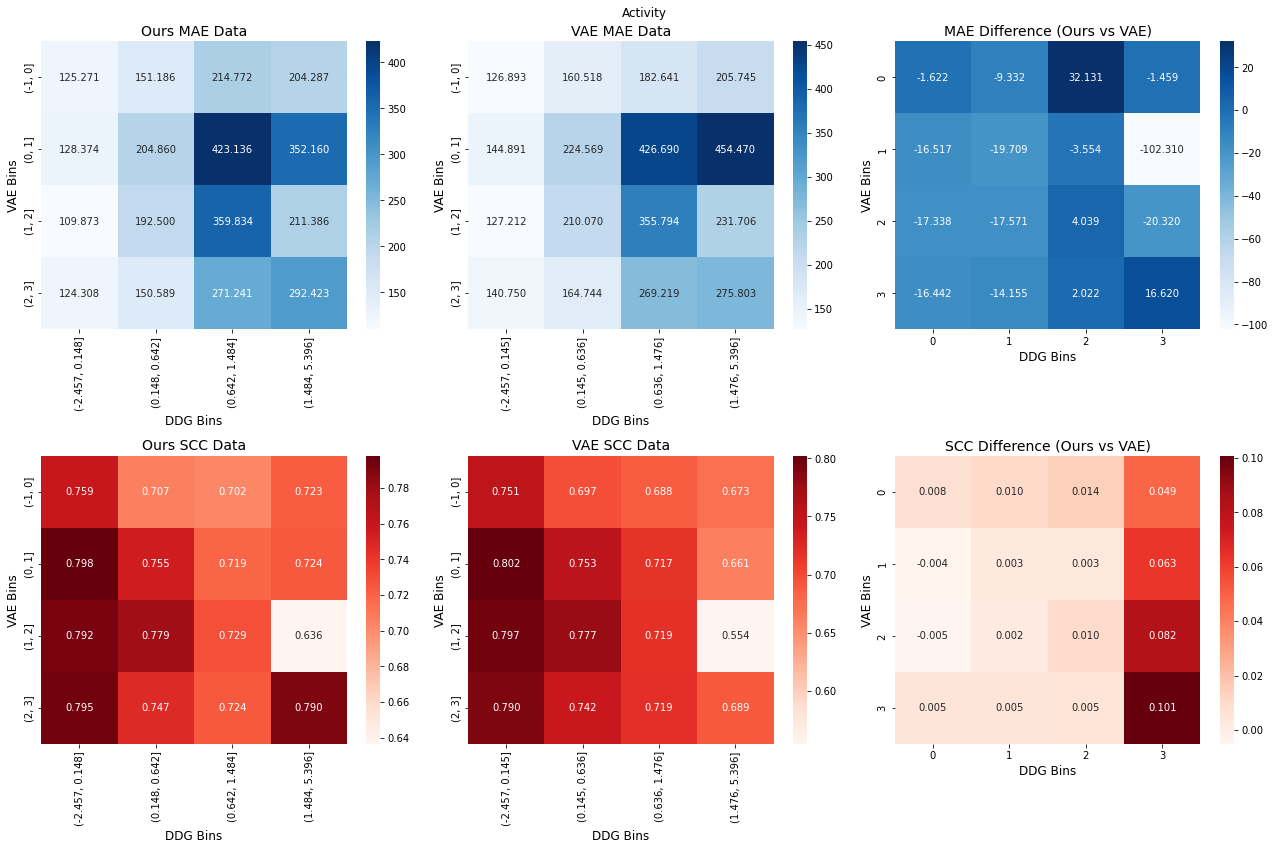

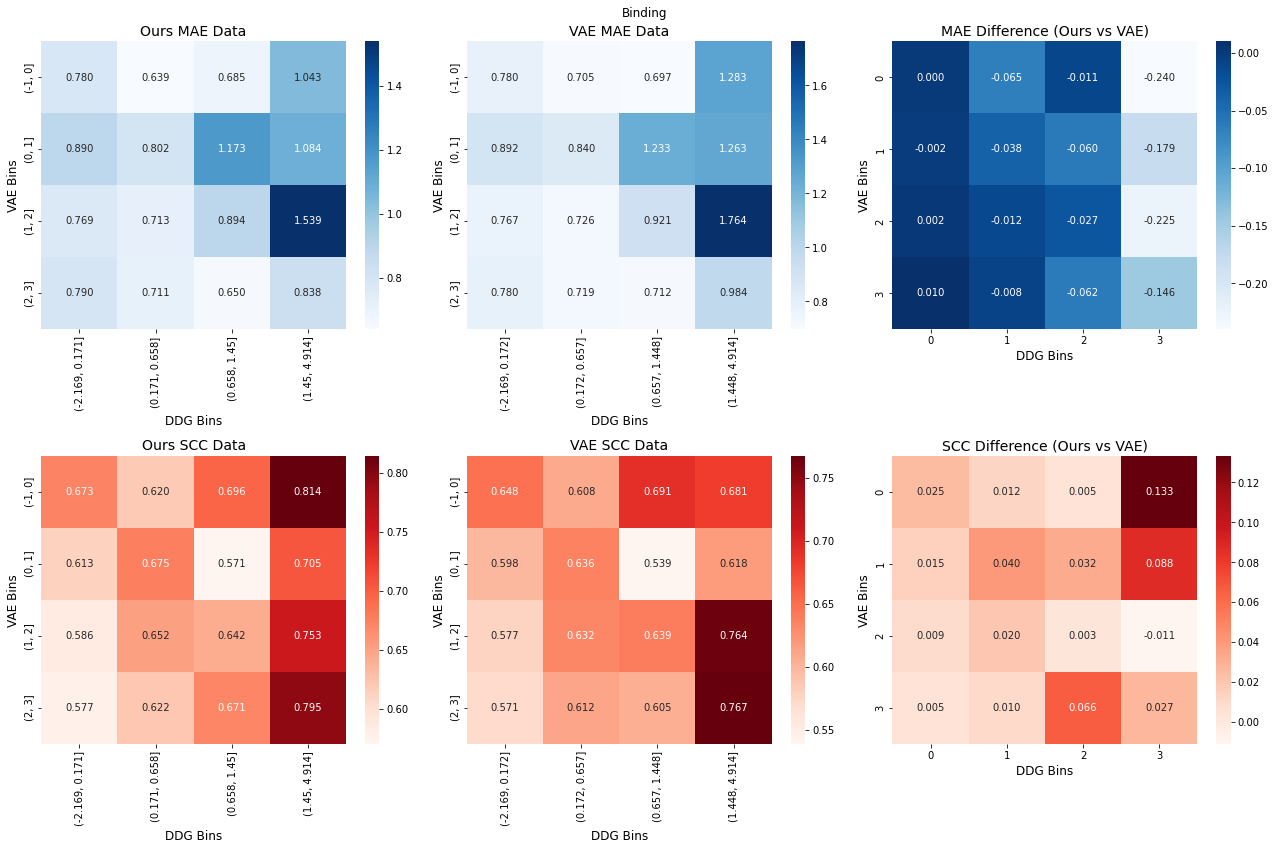

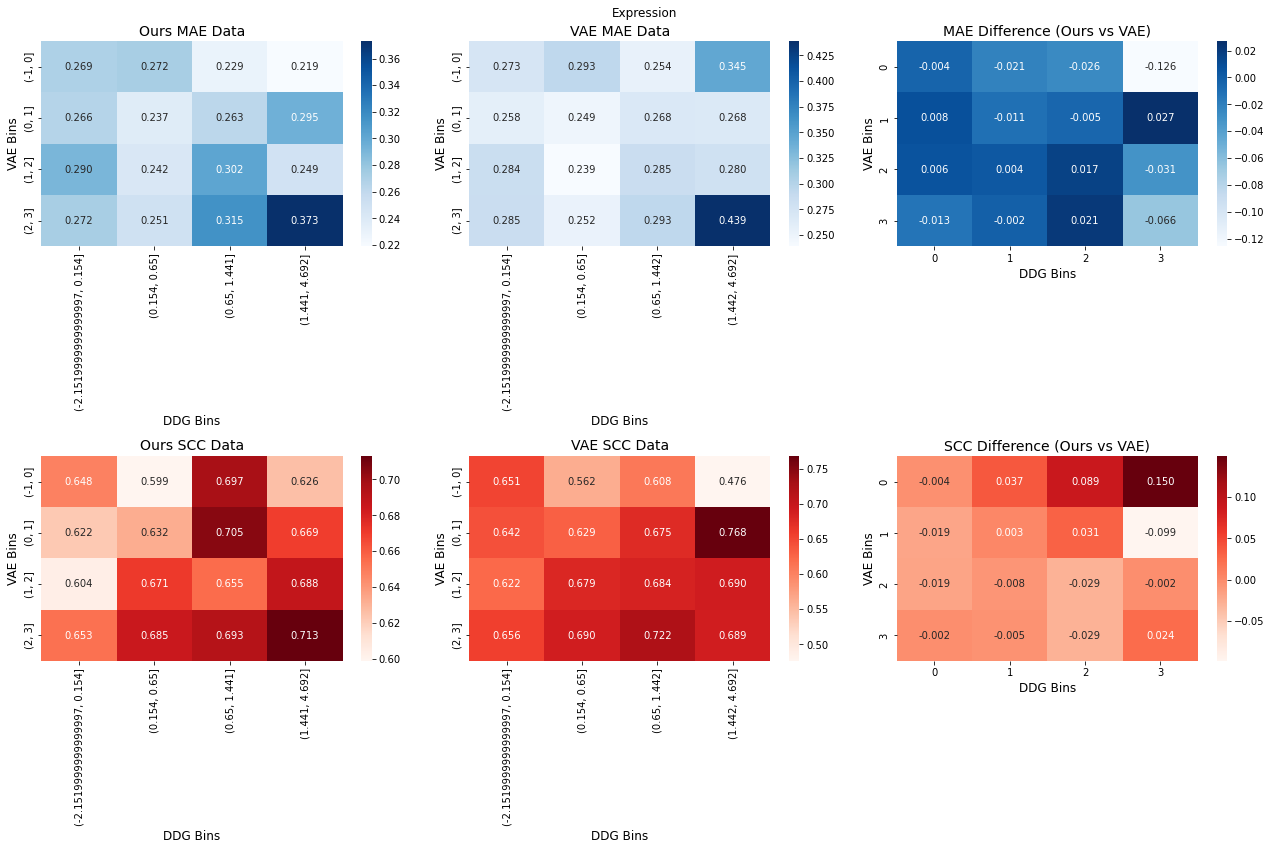

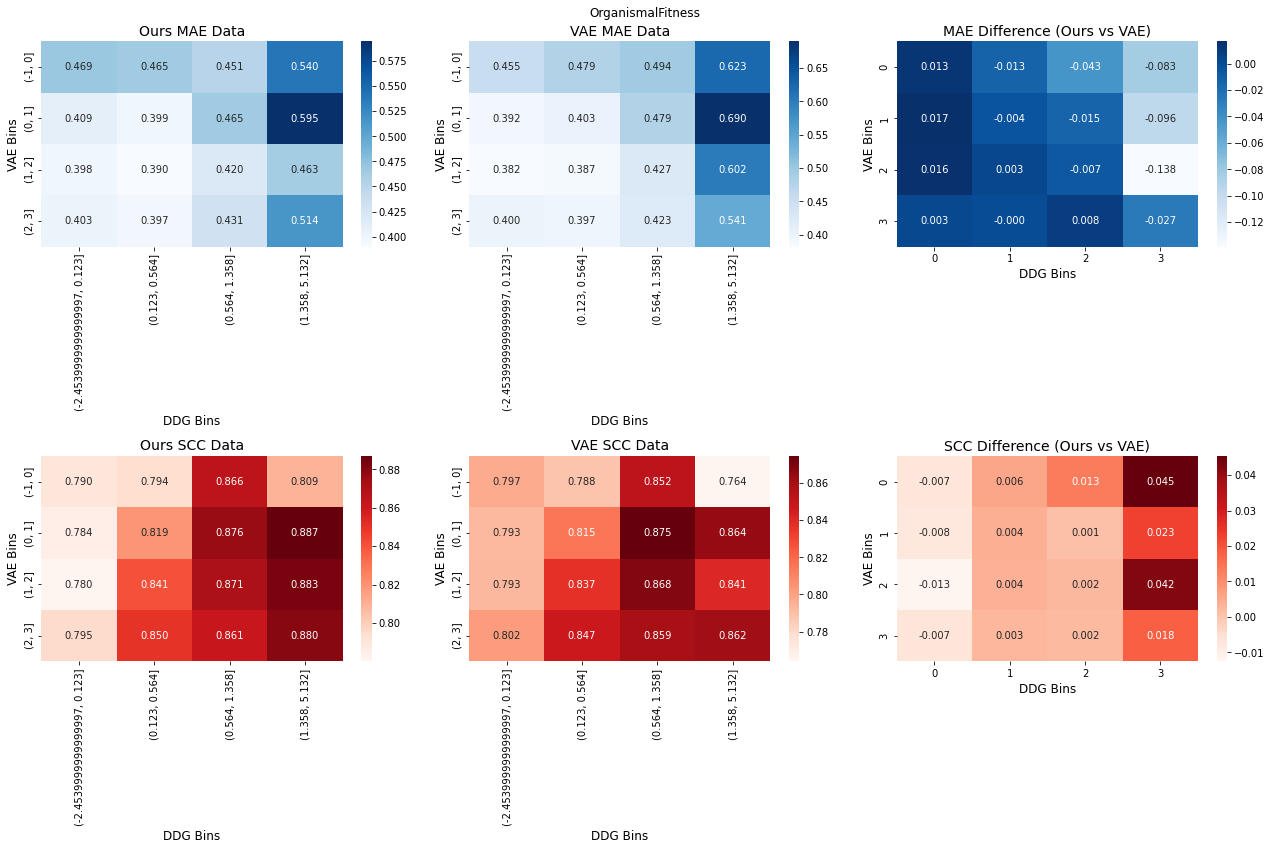

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# 原始数据集的 ddg 和 vae 分成 4 个等量的区间
categories = ['Activity', 'Binding', 'Expression', 'OrganismalFitness']

# 创建子图的外部循环，针对每个 test_name 类型
for category in categories:
    # 根据当前类别过滤数据
    mask = test_name == category
    mask_vae = test_name_vae == category
    ddg_bins = pd.qcut(test_ddg_score_all[mask], 4)
    vae_bins = pd.cut(test_vae_score_all[mask], bins=[-1, 0, 1, 2, 3])

    # 计算 MAE
    def calculate_mae(group):
        return np.mean(np.abs(group['test_pred_all'] - group['test_log_fitness_all']))

    # 计算 Spearman correlation (Rho)
    def cal_rho(group):
        return spearmanr(group['test_pred_all'], group['test_log_fitness_all']).correlation

    # 将原始数据组合成 DataFrame
    df_original = pd.DataFrame({
        'vae_bins': vae_bins,
        'ddg_bins': ddg_bins,
        'test_pred_all': test_pred_all[mask],
        'test_log_fitness_all': test_log_fitness_all[mask]
    })

    # 按照 vae_bins 和 ddg_bins 分组，计算每个分组的 MAE 和 SCC
    mae_data_original = df_original.groupby(['vae_bins', 'ddg_bins']).apply(calculate_mae).unstack()
    rho_data_original = df_original.groupby(['vae_bins', 'ddg_bins']).apply(cal_rho).unstack()

    # 第二组数据的 ddg 和 vae 分成 4 个等量的区间
    ddg_bins_vae = pd.qcut(test_ddg_score_all_vae[mask_vae], 4)
    vae_bins_vae = pd.cut(test_vae_score_all_vae[mask_vae], bins=[-1, 0, 1, 2, 3])

    # 将新数据组合成 DataFrame
    df_vae = pd.DataFrame({
        'vae_bins': vae_bins_vae,
        'ddg_bins': ddg_bins_vae,
        'test_pred_all': test_pred_all_vae[mask_vae],
        'test_log_fitness_all': test_log_fitness_all_vae[mask_vae]
    })

    # 按照 vae_bins 和 ddg_bins 分组，计算每个分组的 MAE 和 SCC
    mae_data_vae = df_vae.groupby(['vae_bins', 'ddg_bins']).apply(calculate_mae).unstack()
    rho_data_vae = df_vae.groupby(['vae_bins', 'ddg_bins']).apply(cal_rho).unstack()

    mae_diff = mae_data_vae.values - mae_data_original.values
    rho_diff = rho_data_vae.values - rho_data_original.values
    mae_diff = -mae_diff
    rho_diff = -rho_diff
    # 创建子图，2x3 布局
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    # 假设你已有数据：mae_data_original, mae_data_vae, mae_diff, rho_data_original, rho_data_vae, rho_diff

    # 绘制 MAE heatmap for Original data
    sns.heatmap(mae_data_original, annot=True, fmt=".3f", cmap="Blues", cbar=True, ax=axes[0, 0])
    axes[0, 0].set_title('Ours MAE Data', fontsize=14)
    axes[0, 0].set_xlabel('DDG Bins', fontsize=12)
    axes[0, 0].set_ylabel('VAE Bins', fontsize=12)

    # 绘制 MAE heatmap for VAE data
    sns.heatmap(mae_data_vae, annot=True, fmt=".3f", cmap="Blues", cbar=True, ax=axes[0, 1])
    axes[0, 1].set_title('VAE MAE Data', fontsize=14)
    axes[0, 1].set_xlabel('DDG Bins', fontsize=12)
    axes[0, 1].set_ylabel('VAE Bins', fontsize=12)

    # 绘制 MAE 差值 heatmap
    sns.heatmap(mae_diff, annot=True, fmt=".3f", cmap="Blues", cbar=True, ax=axes[0, 2])
    axes[0, 2].set_title('MAE Difference (Ours vs VAE)', fontsize=14)
    axes[0, 2].set_xlabel('DDG Bins', fontsize=12)
    axes[0, 2].set_ylabel('VAE Bins', fontsize=12)

    # 绘制 SCC heatmap for Original data
    sns.heatmap(rho_data_original, annot=True, fmt=".3f", cmap="Reds", cbar=True, ax=axes[1, 0])
    axes[1, 0].set_title('Ours SCC Data', fontsize=14)
    axes[1, 0].set_xlabel('DDG Bins', fontsize=12)
    axes[1, 0].set_ylabel('VAE Bins', fontsize=12)

    # 绘制 SCC heatmap for VAE data
    sns.heatmap(rho_data_vae, annot=True, fmt=".3f", cmap="Reds", cbar=True, ax=axes[1, 1])
    axes[1, 1].set_title('VAE SCC Data', fontsize=14)
    axes[1, 1].set_xlabel('DDG Bins', fontsize=12)
    axes[1, 1].set_ylabel('VAE Bins', fontsize=12)

    # 绘制 SCC 差值 heatmap
    sns.heatmap(rho_diff, annot=True, fmt=".3f", cmap="Reds", cbar=True, ax=axes[1, 2])
    axes[1, 2].set_title('SCC Difference (Ours vs VAE)', fontsize=14)
    axes[1, 2].set_xlabel('DDG Bins', fontsize=12)
    axes[1, 2].set_ylabel('VAE Bins', fontsize=12)
    # set title
    fig.suptitle(f'{category}')
    # 调整布局
    plt.tight_layout()
    plt.show()
